In [4]:
import pandas as pd

df = pd.read_csv("sales.csv", encoding='latin1')   # or 'ISO-8859-1'
 

# Check first few rows
df.head()

# Check the column names
df.columns

# See general info about data types and missing values
df.info()

# Quick summary statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
df.columns


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [6]:
import pandas as pd

# Convert Order Date to a proper date type
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Group data by date (sum daily sales)
daily_sales = df.groupby('Order Date')['Sales'].sum().reset_index()

# Rename columns to match Prophet’s expected format
daily_sales.columns = ['ds', 'y']

# Check what it looks like
daily_sales.head()


,ds,y
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,4407.100
4,2014-01-07,87.158


In [7]:
# Reindex to include all days in the range
full_range = pd.date_range(start=daily_sales['ds'].min(), end=daily_sales['ds'].max())
daily_sales = daily_sales.set_index('ds').reindex(full_range).fillna(0.0).rename_axis('ds').reset_index()

daily_sales.head()



,ds,y
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,4407.100
4,2014-01-07,87.158


23:05:32 - cmdstanpy - INFO - Chain [1] start processing
23:05:34 - cmdstanpy - INFO - Chain [1] done processing


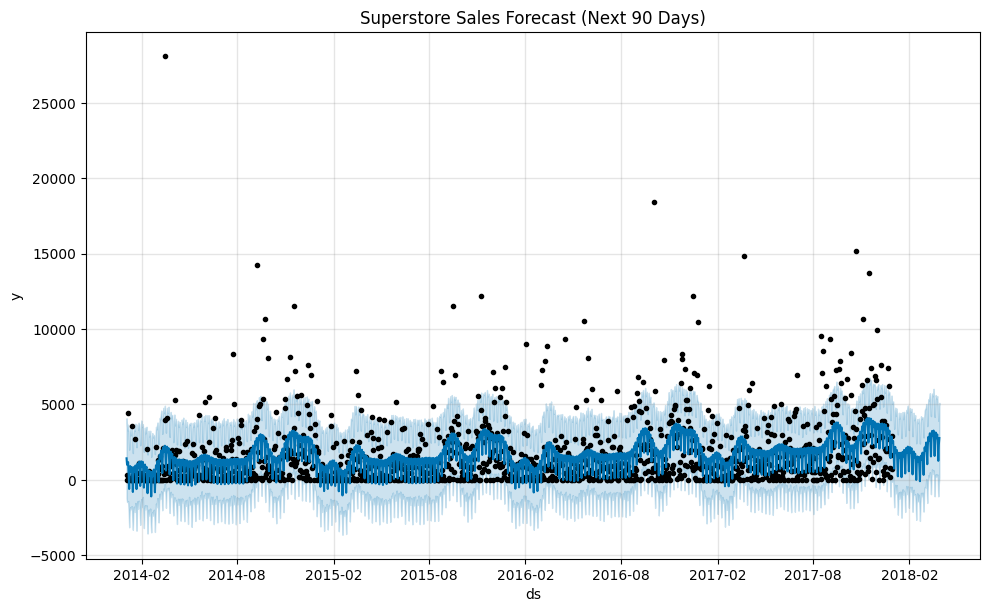

,ds,yhat,yhat_lower,yhat_upper
1543,2018-03-26,3008.732463,363.113800,5555.477734
1544,2018-03-27,2271.791639,-164.850623,4891.533631
1545,2018-03-28,1257.548192,-1098.039630,3915.964582
1546,2018-03-29,2324.967237,-254.565340,4902.897509
1547,2018-03-30,2770.036610,164.923656,5103.323707


In [8]:
from prophet import Prophet
import matplotlib.pyplot as plt

# Initialize model
m = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)

# Fit model to data
m.fit(daily_sales)

# Make future predictions (next 90 days)
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)

# Plot the forecast
m.plot(forecast)
plt.title("Superstore Sales Forecast (Next 90 Days)")
plt.show()

# Optional: see forecast data
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


In [9]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv('forecast_results.csv', index=False)

